In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os

from constants import h_hubble, age_of_universe, yr_to_s, kpc_to_cm, m_sun_to_GeV

Here I reproduce the limits on $\langle \sigma v \rangle$ from [Chris Byrnes' paper](https://arxiv.org/abs/1901.08528). The constraint is

$\Gamma_{\mathrm{DM}} \equiv \frac{f_{\mathrm{PBH}} \, m_{\mathrm{DM}} \, \Gamma_{\mathrm{PBH}}(\langle \sigma v \rangle)}{M_{\mathrm{PBH}}} < 10^{-28}~\mathrm{Hz} \equiv \Gamma_{\mathrm{DM}}^0.$

This can be solved analytically since $\Gamma_{\mathrm{PBH}}(\langle \sigma v \rangle) \propto \langle \sigma v \rangle^{1/3}$:

$\frac{\langle \sigma v \rangle}{\mathrm{cm}^3/\mathrm{s}} = \left[ \frac{f_{\mathrm{PBH}} \, m_{\mathrm{DM}} \, \Gamma_{\mathrm{PBH}}(1~\mathrm{cm}^3/\mathrm{s})}{M_{\mathrm{PBH}} \, \Gamma_{\mathrm{DM}}^0} \right]^{-3}.$

In [134]:
Gamma_dm_bound = 1e-28  # Hz

def Gamma_pbh(m_dm, sv, m_pbh):  # Hz
    rho_max = m_dm / (sv * age_of_universe * yr_to_s)  # GeV / cm^3
    r_cut = 1.3e-7 * h_hubble * (sv / 3e-26)**(4/9) * (m_dm / 100.)**(-4/9) * (m_pbh / 1.)**(1/3)  # kpc
    return 4*np.pi * sv * rho_max**2 * (r_cut * kpc_to_cm)**3 / (m_dm**2)  # Hz

def sv_limit_diffuse(m_dm, m_pbh, f_pbh):  # cm^3 / s
    return (f_pbh * m_dm * Gamma_pbh(m_dm, 1., m_pbh) / (m_pbh*m_sun_to_GeV * Gamma_dm_bound))**(-3)

In [135]:
sv_limit(10., 30., 1e-8), sv_limit(100., 30., 2e-8), sv_limit(1000., 30., 4e-8)

(2.4759753599182206e-26, 3.0949691998977783e-26, 3.868711499872216e-26)

In [136]:
m_dms = np.logspace(1, 4, 100)

# Different detection scenarios
m_n_f_pbhs = [[0.5, 1, 1e-2],
              [0.5, 80, 2e-1],
              [10., 1, 4e-5]]

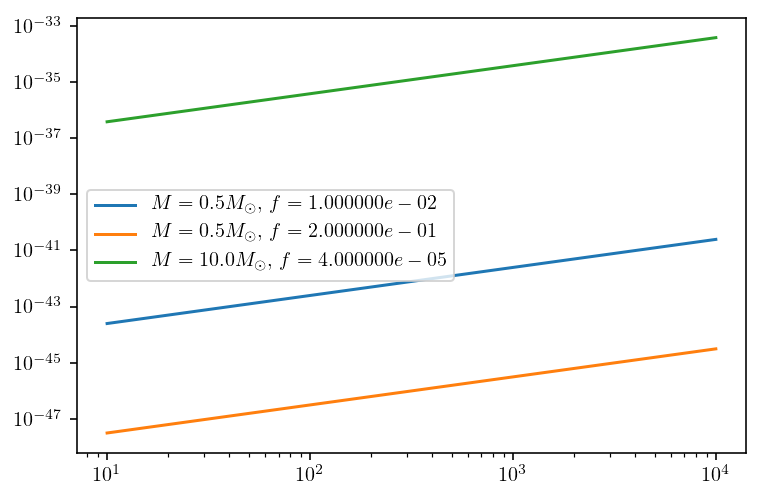

In [137]:
for m, n, f in m_n_f_pbhs:
    plt.loglog(m_dms, sv_limit(m_dms, m, f), label=r"$M = %.1f M_\odot$, $f=%e$" % (m, f))
plt.legend()